In [26]:
import cv2
import os


# validation_results = '/home/d_korostelev/Projects/super_resolution/modeling_sr/checkpoints/experiment0_tomo/validate_results'
validation_results = '/home/d_korostelev/Projects/super_resolution/modeling_sr/checkpoints/experiment0_tomo_x4/validate_results_np_all'
images = os.listdir(validation_results)
len(images)

5

In [7]:
!nvidia-smi

Wed Oct 19 21:44:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:61:00.0 Off |                    0 |
| N/A   65C    P0   233W / 250W |  14283MiB / 16384MiB |     93%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:DB:00.0 Off |                    0 |
| N/A   

(512, 1536, 1)
(512, 1536, 1)
(512, 1536, 1)
(512, 1536, 1)
(512, 1536, 1)


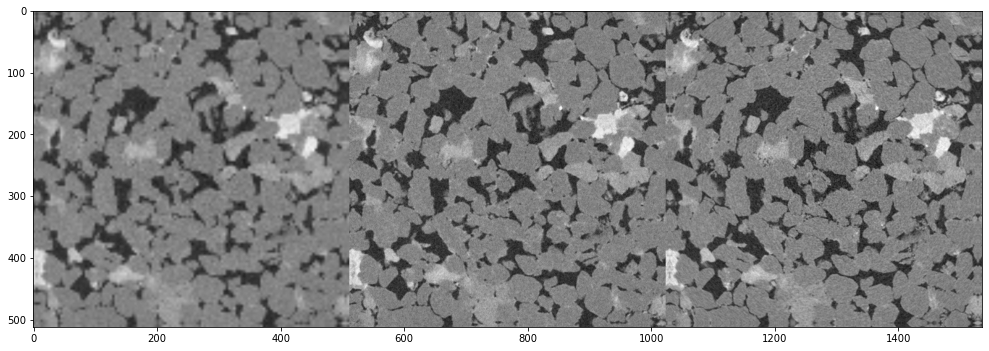

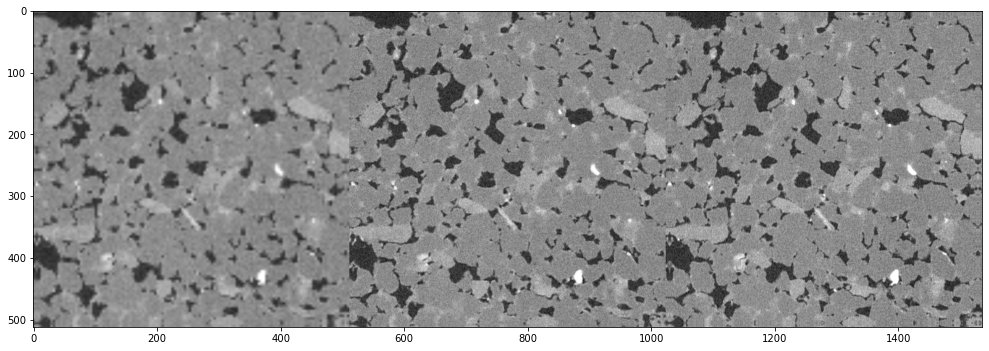

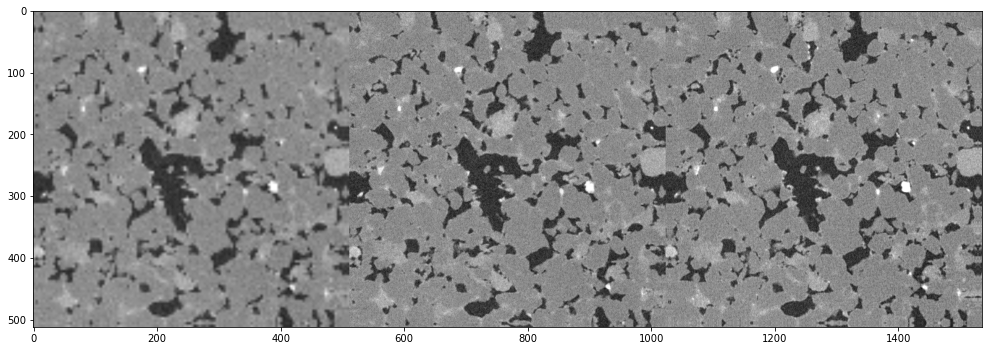

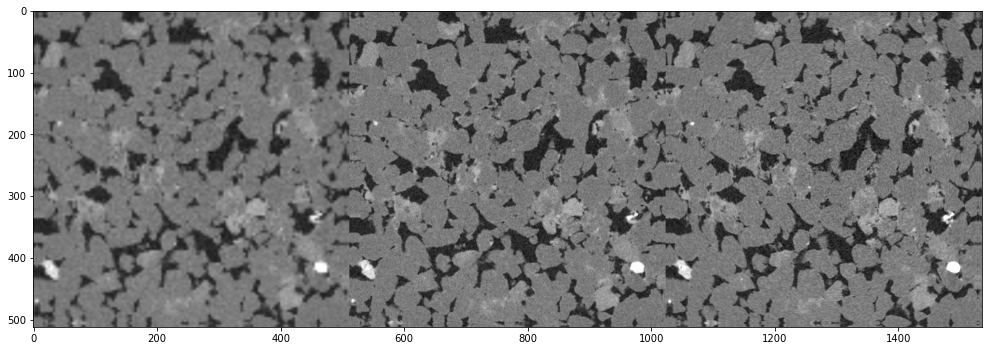

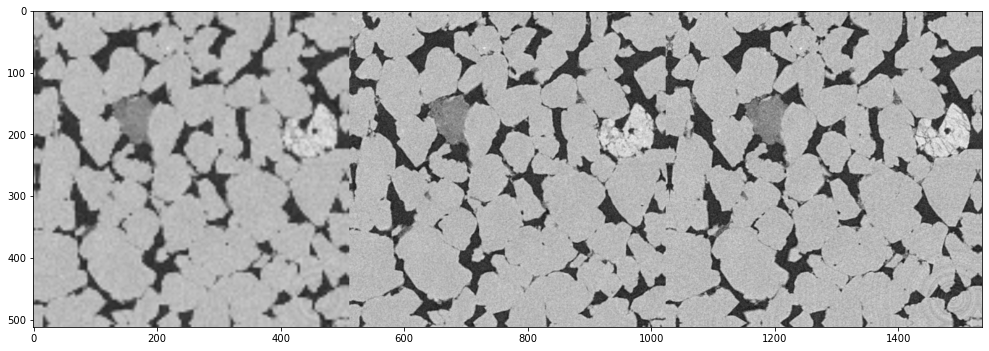

In [27]:
import matplotlib.pyplot as plt
import numpy as np

img_size = 512
for img_path in images:
    image = np.load(os.path.join(validation_results, img_path), allow_pickle=False)
    # print(image.shape)
    lr_image = image[:, :img_size, :]
    hr_image = image[:, img_size * 2:, :]
    sr_image = image[:,img_size:img_size * 2, :]
    
    plt.figure(figsize=(17, 17))
    plt.imshow(image, cmap='gray')
    
#     plt.figure(figsize=(13, 13))
#     plt.imshow(sr_image - hr_image, cmap='magma')
    
#     plt.figure(figsize=(13, 13))
#     plt.imshow(hr_image)
    
#     plt.figure(figsize=(13, 13))
#     plt.imshow(sr_image)
    # break

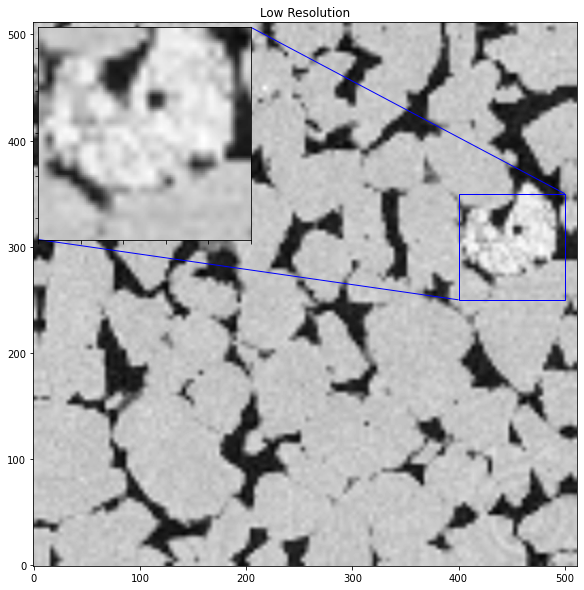

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL


def plot_results(img, region, prefix, title):
    """Plot the result with zoom-in area."""
    img_array = img
    img_array = img_array.astype("float32")

    # Create a new figure with a default 111 subplot.
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(img_array[::-1], origin="lower", cmap='gray')

    plt.title(title)
    # zoom-factor: 2.0, location: upper-left
    axins = zoomed_inset_axes(ax, 2, loc=2)
    axins.imshow(img_array[::-1], origin="lower", cmap='gray')

    # Specify the limits.
    x1, x2, y1, y2 = region
    # Apply the x-limits.
    axins.set_xlim(x1, x2)
    # Apply the y-limits.
    axins.set_ylim(y1, y2)

    plt.yticks(visible=False)
    plt.xticks(visible=False)

    # Make the line.
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="blue")
    plt.savefig(str(prefix) + "-" + title + ".png")
    plt.show()
    
# region = (200, 300, 100, 200)
region = (400, 500, 250, 350)
plot_results(lr_image, region, '512', 'Low Resolution')

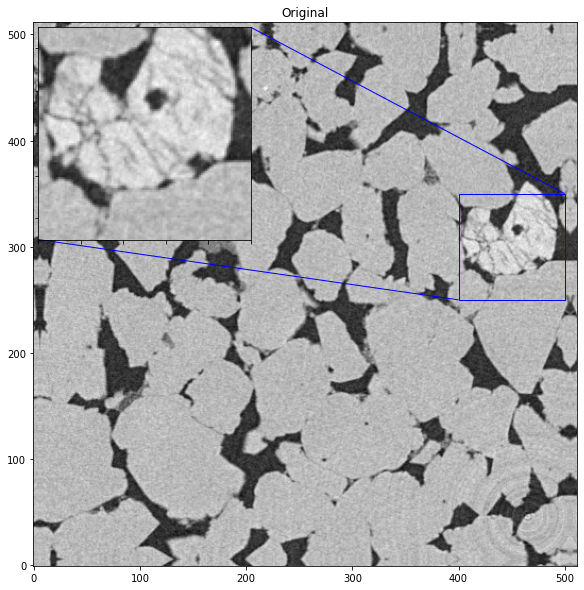

In [44]:
plot_results(hr_image, region, '512', 'Original')

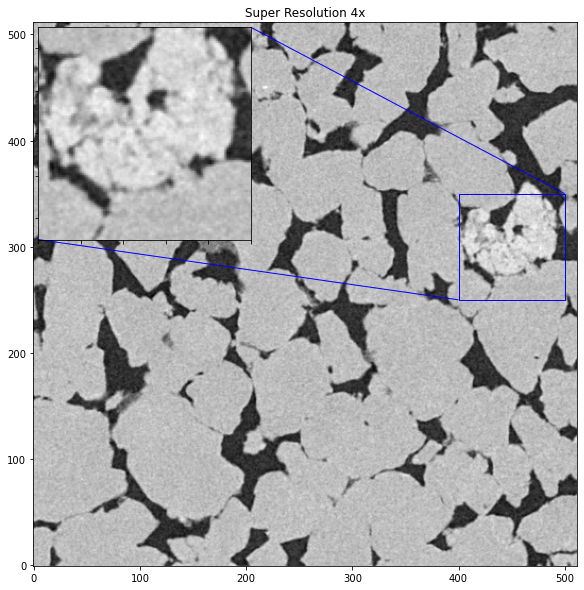

In [45]:
plot_results(sr_image, region, '512', 'Super Resolution 4x')